# Prediksi Time-Series Data

In [1]:
import torch
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim
import torch.nn as nn
import torch.nn.init as init
from sklearn.metrics import mean_absolute_error

In [2]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob):
        super(RNN, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # RNN layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out
    
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5

model = RNN(input_size, hidden_size, num_layers, num_classes, dropout_prob)
model

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): RNN(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [3]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout_prob)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out
    
    
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5

model = LSTM(input_size, hidden_size, num_layers, num_classes, dropout_prob)
model

LSTM(
  (lstm): LSTM(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_prob):
        super(GRU, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
    
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5

model = GRU(input_size, hidden_size, num_layers, num_classes, dropout_prob)
model

GRU(
  (gru): GRU(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

# Melbourne Temperature (1981-1990)

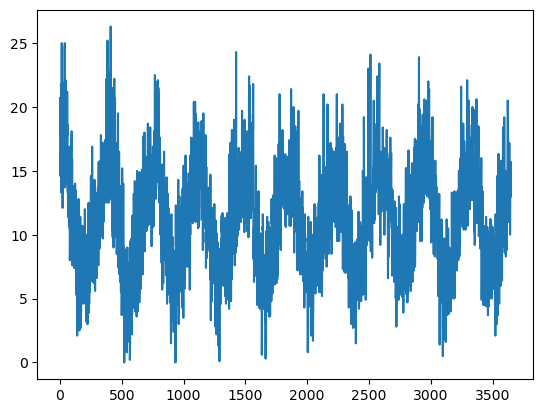

In [5]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
lr = 0.1
ts_data = pd.read_csv("melbourne_temperature_1981-1990.txt")
data = np.array(ts_data['Temp'])
seq_length = len(data)-1
data_time_steps = np.array(ts_data.index)
data.resize(len(data), 1)

plt.plot(data)

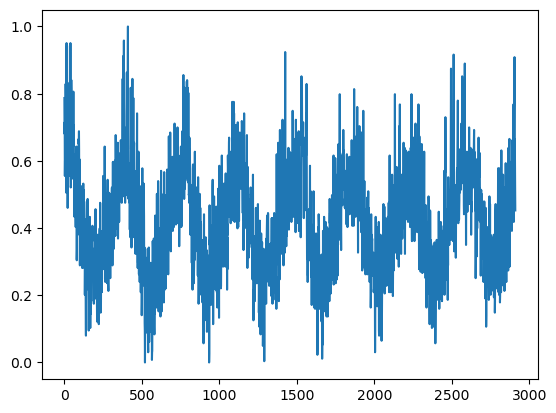

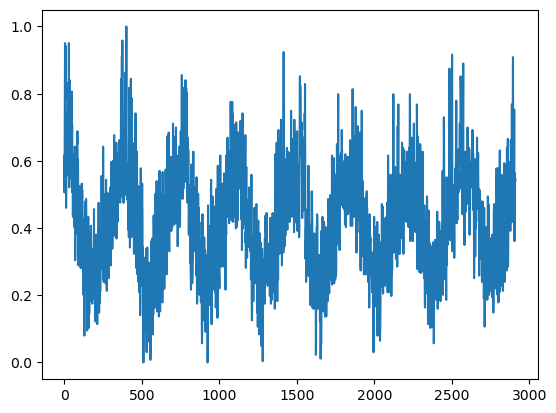

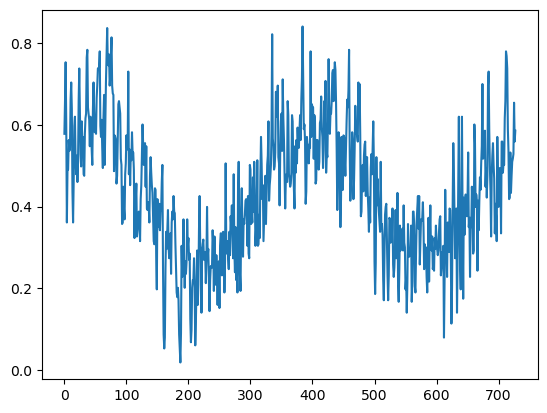

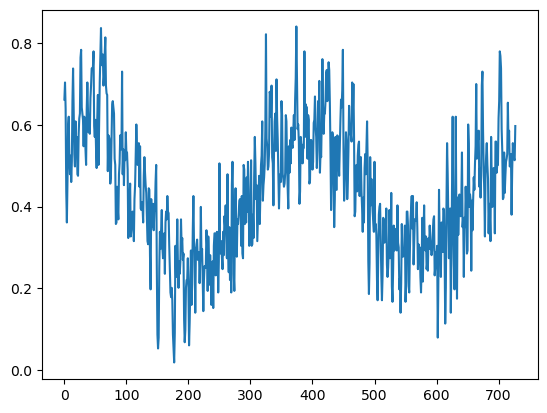

In [6]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(data)

seq_length = 10
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

plt.plot(trainX[:,0,0].numpy())
plt.show()
plt.close()
plt.plot(trainY[:,0].numpy())
plt.show()
plt.close()
plt.plot(testX[:,0,0].numpy())
plt.show()
plt.close()
plt.plot(testY[:,0].numpy())
plt.show()
plt.close()

### RNN

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, loss: 0.11663
Epoch: 100, loss: 0.01041
Epoch: 200, loss: 0.00990
Epoch: 300, loss: 0.00979
Epoch: 400, loss: 0.00974
Epoch: 500, loss: 0.00973
Epoch: 600, loss: 0.00972
Epoch: 700, loss: 0.00972
Epoch: 800, loss: 0.00972
Epoch: 900, loss: 0.00972
RNN(
  (rnn): RNN(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
mean absolute error test =  1.9899821


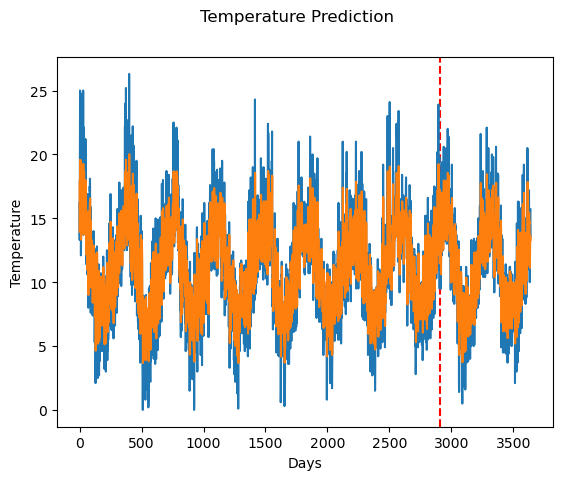

In [7]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = RNN(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Temperature Prediction')
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.show()



### LSTM

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, loss: 0.31800
Epoch: 100, loss: 0.02054
Epoch: 200, loss: 0.01470
Epoch: 300, loss: 0.00976
Epoch: 400, loss: 0.00948
Epoch: 500, loss: 0.00934
Epoch: 600, loss: 0.00925
Epoch: 700, loss: 0.00918
Epoch: 800, loss: 0.00913
Epoch: 900, loss: 0.00909
LSTM(
  (lstm): LSTM(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
mean absolute error test =  1.9155908


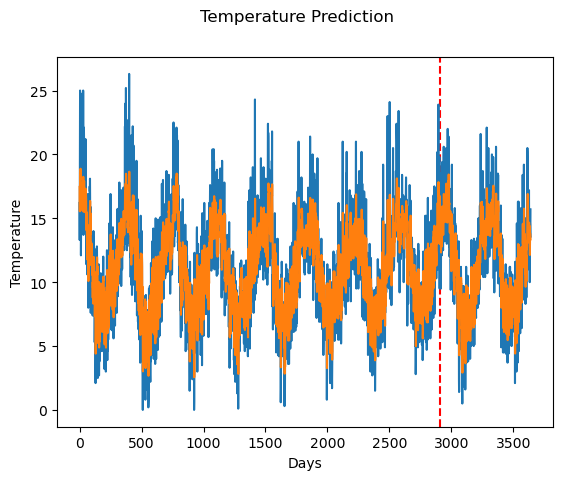

In [8]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = LSTM(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Temperature Prediction')
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.show()



### GRU

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, loss: 0.02972
Epoch: 100, loss: 0.01903
Epoch: 200, loss: 0.01032
Epoch: 300, loss: 0.00980
Epoch: 400, loss: 0.00976
Epoch: 500, loss: 0.00974
Epoch: 600, loss: 0.00973
Epoch: 700, loss: 0.00973
Epoch: 800, loss: 0.00972
Epoch: 900, loss: 0.00972
GRU(
  (gru): GRU(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
mean absolute error test =  1.9854751


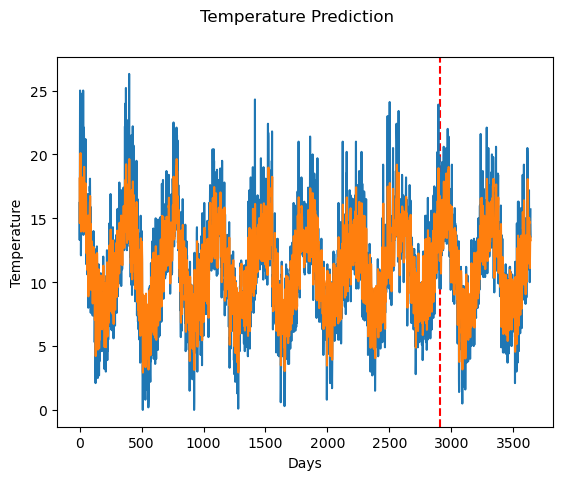

In [9]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = GRU(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Temperature Prediction')
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.show()



# Sunspots (1749-1983)

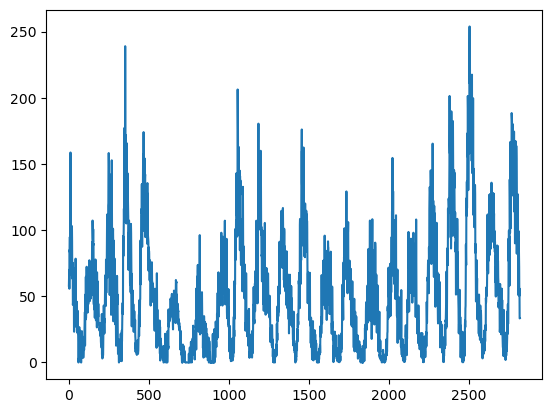

In [10]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
lr = 0.1
ts_data = pd.read_csv("sunspots_1749-1983.txt")
data = np.array(ts_data['Sunspots'])
data_time_steps = np.array(ts_data.index)
data.resize((len(data), 1))

plt.plot(data)

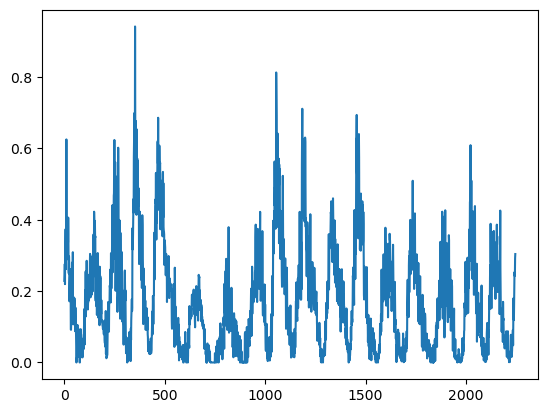

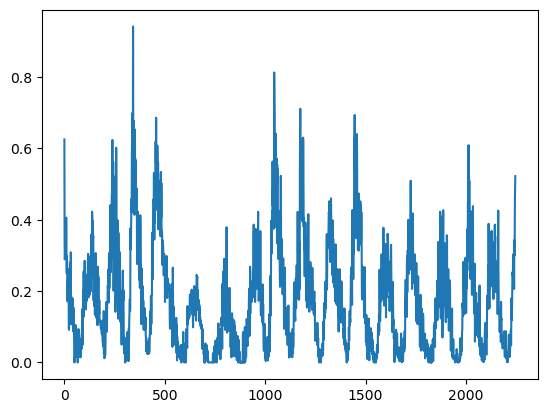

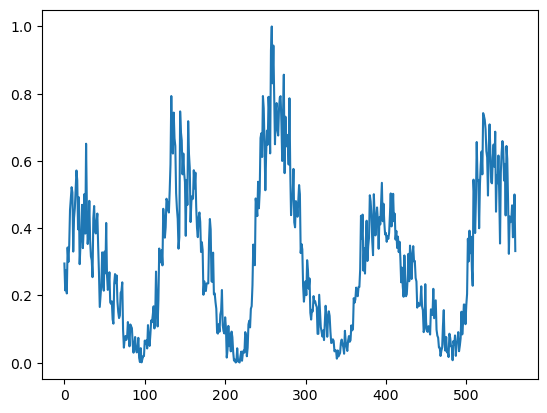

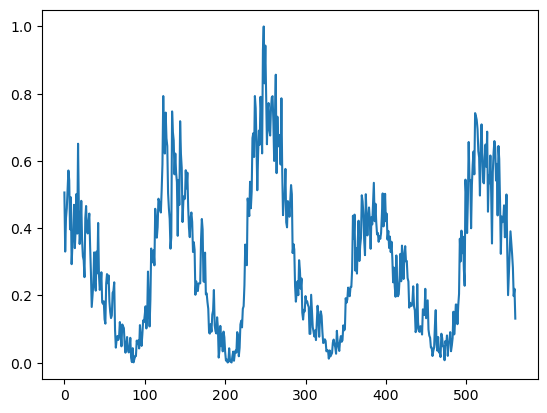

In [11]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(data)

seq_length = 10
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

plt.plot(trainX[:,0,0].numpy())
plt.show()
plt.close()
plt.plot(trainY[:,0].numpy())
plt.show()
plt.close()
plt.plot(testX[:,0,0].numpy())
plt.show()
plt.close()
plt.plot(testY[:,0].numpy())
plt.show()
plt.close()

### RNN

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, loss: 0.05812
Epoch: 100, loss: 0.00396
Epoch: 200, loss: 0.00364
Epoch: 300, loss: 0.00361
Epoch: 400, loss: 0.00359
Epoch: 500, loss: 0.00358
Epoch: 600, loss: 0.00357
Epoch: 700, loss: 0.00355
Epoch: 800, loss: 0.00354
Epoch: 900, loss: 0.00353
RNN(
  (rnn): RNN(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
mean absolute error test =  11.520583


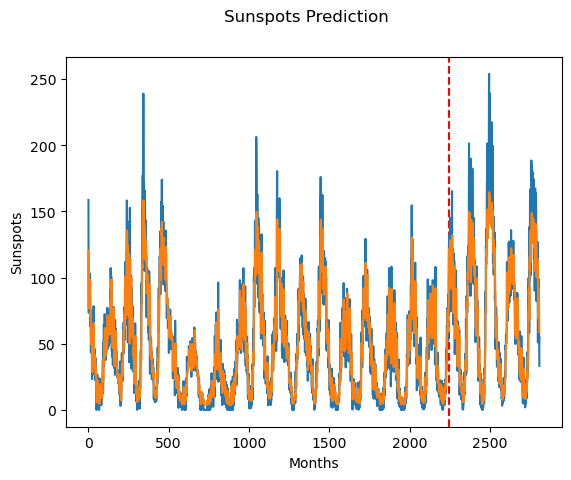

In [12]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = RNN(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Sunspots Prediction')
plt.ylabel('Sunspots')
plt.xlabel('Months')
plt.show()



### LSTM

C:\Users\cleve\.conda\envs\deeplearning\Lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, loss: 0.96180
Epoch: 100, loss: 0.02109
Epoch: 200, loss: 0.02006
Epoch: 300, loss: 0.01885
Epoch: 400, loss: 0.01680
Epoch: 500, loss: 0.00540
Epoch: 600, loss: 0.00404
Epoch: 700, loss: 0.00369
Epoch: 800, loss: 0.00357
Epoch: 900, loss: 0.00351
LSTM(
  (lstm): LSTM(1, 1, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
mean absolute error test =  11.515128


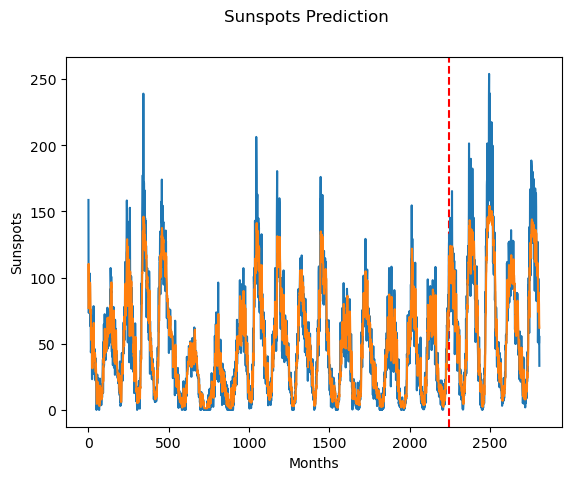

In [13]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = LSTM(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Sunspots Prediction')
plt.ylabel('Sunspots')
plt.xlabel('Months')
plt.show()



### GRU

In [ ]:
input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
dropout_prob = 0.5
model = GRU(num_classes, input_size, hidden_size, num_layers, dropout_prob)

num_epochs = 1000
learning_rate = 0.01
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX).mean(1).unsqueeze(1)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
print(model.eval())
train_predict = model(dataX).mean(1).unsqueeze(1)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

print('mean absolute error test = ', mean_absolute_error(dataY_plot, data_predict))

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Sunspots Prediction')
plt.ylabel('Sunspots')
plt.xlabel('Months')
plt.show()

